In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define probabilities and odds for each match
matches = [
    {'team': 'Gornik Zabrze vs Pogon', 'win': 0.35, 'draw': 0.29, 'loss': 0.36, 'win_odds': 2.86, 'draw_odds': 3.45, 'loss_odds': 2.78},
    {'team': 'Fortuna Sittard vs De Graafschap', 'win': 0.52, 'draw': 0.31, 'loss': 0.17, 'win_odds': 1.92, 'draw_odds': 3.23, 'loss_odds': 5.88},
    {'team': 'Falkirk vs Queens Park FC', 'win': 0.22, 'draw': 0.27, 'loss': 0.51, 'win_odds': 4.55, 'draw_odds': 3.70, 'loss_odds': 1.96},
    {'team': 'Almere vs Utrecht', 'win': 0.10, 'draw': 0.39, 'loss': 0.51, 'win_odds': 10.00, 'draw_odds': 2.56, 'loss_odds': 1.96},
    {'team': 'Waterford vs Shamrock', 'win': 0.25, 'draw': 0.30, 'loss': 0.45, 'win_odds': 4.00, 'draw_odds': 3.33, 'loss_odds': 2.22},
    {'team': 'Otelul vs Hermannstadt', 'win': 0.42, 'draw': 0.41, 'loss': 0.17, 'win_odds': 2.38, 'draw_odds': 2.44, 'loss_odds': 5.88},
    {'team': 'NK Radomlje vs NK Domzale', 'win': 0.40, 'draw': 0.28, 'loss': 0.32, 'win_odds': 2.50, 'draw_odds': 3.57, 'loss_odds': 3.13},
]

In [3]:
# Step 2: Generate all possible combinations of outcomes (win, draw, loss)
outcomes = ['win', 'draw', 'loss']
combinations = list(itertools.product(outcomes, repeat=len(matches)))

In [4]:
# Step 3: Calculate total probability, total odds, and expected value for each combination
results = []
for combo in combinations:
    total_prob = 1.0
    total_odds = 1.0
    for i, outcome in enumerate(combo):
        match = matches[i]
        total_prob *= match[outcome]
        total_odds *= match[f'{outcome}_odds']
    # Calculate the expected value for the combination
    expected_value = (total_prob * total_odds) - (1 - total_prob)
    results.append((combo, total_prob, total_odds, expected_value))

In [5]:
# Step 4: Convert results to DataFrame for easier analysis
df = pd.DataFrame(results, columns=['Combination', 'Total Probability', 'Total Odds', 'Expected Value'])

In [6]:
# Step 5: Filter combinations with a positive expected value
positive_ev_bets = df[df['Expected Value'] > 0]

In [7]:
# Step 6: Sort by Expected Value, then by Total Probability, then by Total Odds
sorted_bets = positive_ev_bets.sort_values(by=['Expected Value', 'Total Probability', 'Total Odds'], ascending=[False, False, False])

In [8]:
# Step 7: Select the top 10 bets (adjust the number based on your preference)
top_bets = sorted_bets.head(10)

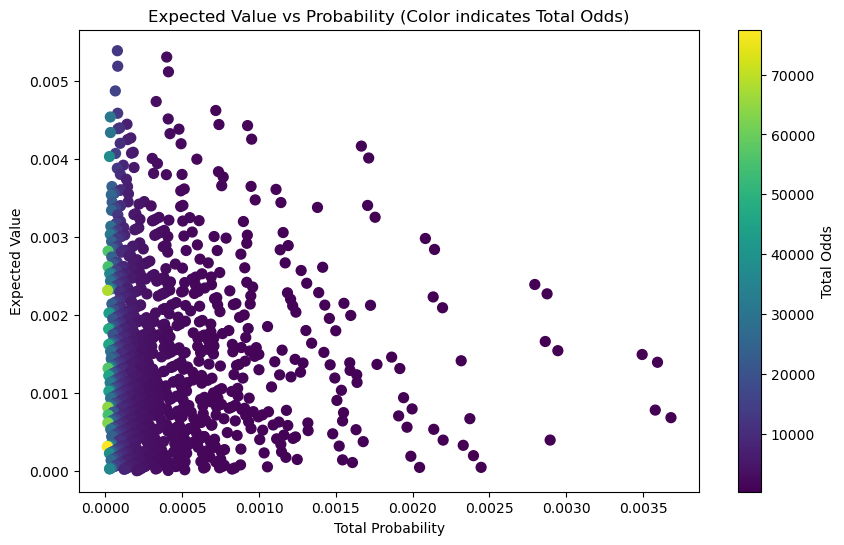

In [9]:
# Step 8: Visualize the relationship between expected value, probability, and odds
plt.figure(figsize=(10, 6))
plt.scatter(sorted_bets['Total Probability'], sorted_bets['Expected Value'], c=sorted_bets['Total Odds'], cmap='viridis', s=50)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Color indicates Total Odds)')
plt.show()

                                    Combination  Total Probability  \
302     (win, draw, win, loss, win, draw, loss)           0.000399   
1760   (loss, draw, win, loss, win, draw, loss)           0.000411   
299      (win, draw, win, loss, win, win, loss)           0.000409   
311    (win, draw, win, loss, draw, draw, loss)           0.000479   
1757    (loss, draw, win, loss, win, win, loss)           0.000421   
1769  (loss, draw, win, loss, draw, draw, loss)           0.000493   
1049  (draw, draw, win, loss, loss, draw, loss)           0.000596   
1028    (draw, draw, win, loss, win, win, loss)           0.000339   
300      (win, draw, win, loss, win, draw, win)           0.000499   
1040  (draw, draw, win, loss, draw, draw, loss)           0.000397   

       Total Odds  Expected Value  
302   2516.692638        0.005308  
1760  2446.295641        0.005119  
299   2454.806753        0.004514  
311   2095.146621        0.004383  
1757  2386.140830        0.004325  
1769  2036.54

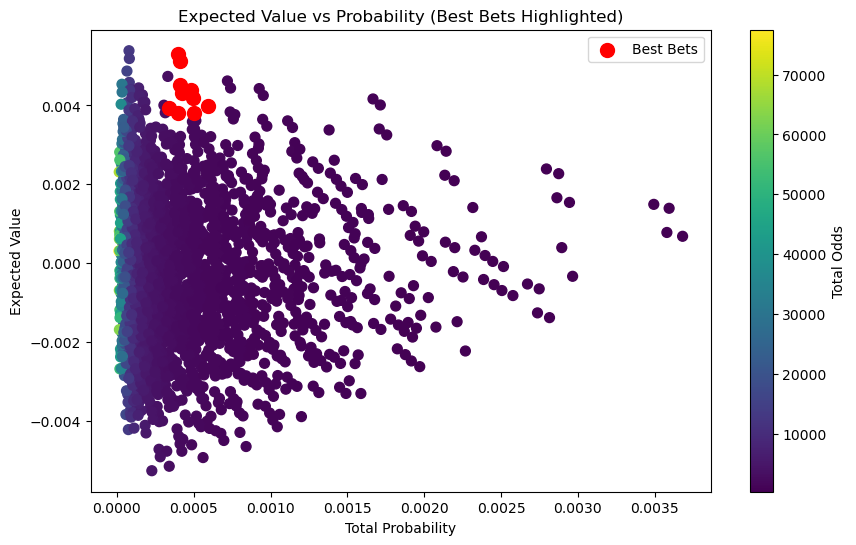

In [27]:
import numpy as np

# Define thresholds for high expected value, reasonable probability, and balanced odds
expected_value_threshold = df['Expected Value'].quantile(0.75)  # Top 25% for expected value
probability_threshold_min = df['Total Probability'].quantile(0.55)  # Above the 25th percentile for probability
probability_threshold_max = df['Total Probability'].quantile(0.95)  # Below the 75th percentile for probability
odds_threshold_min = df['Total Odds'].quantile(0.25)  # Avoid very high odds, which might be too risky

# Apply filtering based on the criteria
filtered_bets = df[
    (df['Expected Value'] >= expected_value_threshold) &
    (df['Total Probability'] >= probability_threshold_min) &
    (df['Total Probability'] <= probability_threshold_max) &
    (df['Total Odds'] >= odds_threshold_min)
]

# Sort by Expected Value in descending order to get the best bets at the top
best_bets = filtered_bets.sort_values(by='Expected Value', ascending=False)

# Display the top 10 best bets based on these criteria
top_bets_based_on_criteria = best_bets.head(10)
print(top_bets_based_on_criteria)

# Optionally, you could visualize these on the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Probability'], df['Expected Value'], c=df['Total Odds'], cmap='viridis', s=50)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Best Bets Highlighted)')
plt.scatter(
    top_bets_based_on_criteria['Total Probability'],
    top_bets_based_on_criteria['Expected Value'],
    color='red', s=100, label='Best Bets'
)
plt.legend()
plt.show()


In [10]:
# Step 9: Backtest Against Actual Results

# Actual results
actual_results = {
    "Gornik Zabrze vs Pogon": "loss",
    "Fortuna Sittard vs De Graafschap": "loss",
    "Falkirk vs Queens Park FC": "win",
    "Almere vs Utrecht": "loss",
    "Waterford vs Shamrock": "loss",
    "Otelul vs Hermannstadt": "win",
    "NK Radomlje vs NK Domzale": "win"
}

In [11]:
# Step 10: Filter combinations to match actual results
filtered_combinations = []
matching_row_indices = []

for idx, (combo, prob, odds, ev) in enumerate(sorted_bets.itertuples(index=False)):
    matches_actual_results = True
    for i, outcome in enumerate(combo):
        match_name = matches[i]['team']
        if outcome != actual_results[match_name]:
            matches_actual_results = False
            break
    
    if matches_actual_results:
        filtered_combinations.append((combo, prob, odds, ev))
        matching_row_indices.append(idx)

In [12]:
# Step 11: Display the matching rows if they exist
if matching_row_indices:
    matching_rows = sorted_bets.iloc[matching_row_indices]
else:
    matching_rows = None

In [15]:
matching_rows

,Combination,Total Probability,Total Odds,Expected Value
2016,"(loss, loss, win, loss, loss, win, win)",0.000519,1925.570971,0.000118


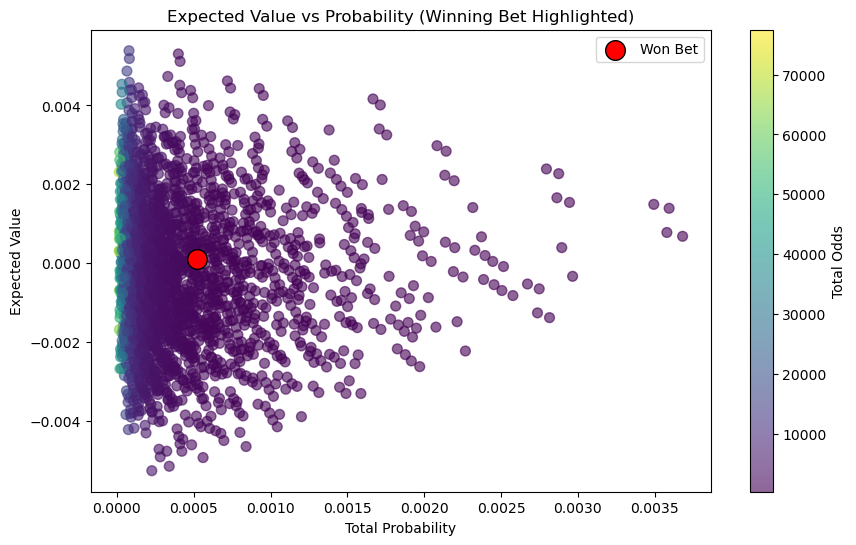

In [25]:
import matplotlib.pyplot as plt

# Assuming 'matching_rows' is the DataFrame with your matching bet
# Extract the 'Total Probability', 'Total Odds', and 'Expected Value' for the winning combination
won_bet = matching_rows.iloc[0]  # Assuming there is only one matching row

# Plot the existing scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Probability'], df['Expected Value'], c=df['Total Odds'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Winning Bet Highlighted)')

# Highlight the winning bet
plt.scatter(won_bet['Total Probability'], won_bet['Expected Value'], color='red', s=200, edgecolor='black', label='Won Bet')

plt.legend()
plt.show()
